In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 20s 10us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 5s 8us/step


In [7]:
train_labels[10]

3

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
from keras.utils.np_utils import to_categorical    #one hot encoding through categorial
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 274us/sample - loss: 2.5619 - accuracy: 0.5395 - val_loss: 1.6465 - val_accuracy: 0.6440
Epoch 2/20
7982/7982 [==============================] - 1s 164us/sample - loss: 1.3515 - accuracy: 0.7139 - val_loss: 1.2723 - val_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 159us/sample - loss: 1.0189 - accuracy: 0.7761 - val_loss: 1.1111 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 163us/sample - loss: 0.8065 - accuracy: 0.8240 - val_loss: 1.0738 - val_accuracy: 0.7500
Epoch 5/20
7982/7982 [==============================] - 1s 173us/sample - loss: 0.6456 - accuracy: 0.8611 - val_loss: 0.9581 - val_accuracy: 0.7890
Epoch 6/20
7982/7982 [==============================] - 1s 181us/sample - loss: 0.5167 - accuracy: 0.8928 - val_loss: 0.9191 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 164us

In [38]:
history

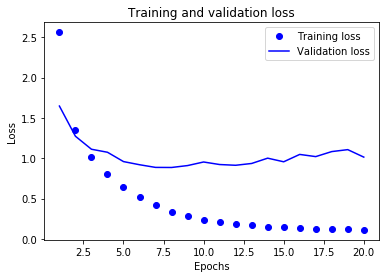

In [39]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

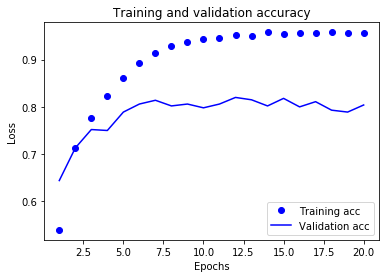

In [42]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 228us/sample - loss: 2.5705 - accuracy: 0.4950 - val_loss: 1.6991 - val_accuracy: 0.6600
Epoch 2/9
7982/7982 [==============================] - 1s 159us/sample - loss: 1.3939 - accuracy: 0.7129 - val_loss: 1.2637 - val_accuracy: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 161us/sample - loss: 1.0275 - accuracy: 0.7767 - val_loss: 1.0992 - val_accuracy: 0.7660
Epoch 4/9
7982/7982 [==============================] - 1s 161us/sample - loss: 0.8071 - accuracy: 0.8287 - val_loss: 1.0186 - val_accuracy: 0.7660
Epoch 5/9
7982/7982 [==============================] - 1s 166us/sample - loss: 0.6425 - accuracy: 0.8631 - val_loss: 0.9451 - val_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 165us/sample - loss: 0.5122 - accuracy: 0.8919 - val_loss: 0.9048 - val_accuracy: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 173us/sample

In [35]:
results

[0.9957026976723811, 0.7885129]